<a href="https://colab.research.google.com/github/lauramendescd/Lab_DataScience/blob/main/Olympics_Medals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o conjunto de dados
df = pd.read_csv('athlete_events.csv')
df = df.dropna()
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [3]:
#info() verifica as informações do conjunto de dados(número de linhas,colunas, tipo das variáveis)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [4]:
# rename para renomear colunas do df
df = df.rename(columns={'Age': 'Idade', 'Name': 'Nome', 'Weight': 'Peso', 
                        'Sex':'Sexo', 'Games': 'Jogos', 'Year': 'Ano', 'Sport': 'Esporte',
                        'Medal':'Medalha', 'Season':'Estação', 'Height': 'Altura', 'Time':'Tempo'})

# verificando se foi renomeada 
print(df)
df = df.dropna()


            ID                                 Nome Sexo  Idade  Altura  Peso  \
40          16             Juhamatti Tapio Aaltonen    M   28.0   184.0  85.0   
41          17              Paavo Johannes Aaltonen    M   28.0   175.0  64.0   
42          17              Paavo Johannes Aaltonen    M   28.0   175.0  64.0   
44          17              Paavo Johannes Aaltonen    M   28.0   175.0  64.0   
48          17              Paavo Johannes Aaltonen    M   28.0   175.0  64.0   
...        ...                                  ...  ...    ...     ...   ...   
271078  135553  Galina Ivanovna Zybina (-Fyodorova)    F   25.0   168.0  80.0   
271080  135553  Galina Ivanovna Zybina (-Fyodorova)    F   33.0   168.0  80.0   
271082  135554                         Bogusaw Zych    M   28.0   182.0  82.0   
271102  135563            Olesya Nikolayevna Zykina    F   19.0   171.0  64.0   
271103  135563            Olesya Nikolayevna Zykina    F   23.0   171.0  64.0   

                Team  NOC  

In [5]:
#describe() para gerar estatísticas descritivas do df
df.describe()

,ID,Idade,Altura,Peso,Ano
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


In [6]:
# filtragem de atletas mulheres e calculos da média, mínimo e máximo de idade e altura
atletas_mulheres = df[df['Sexo'] == 'F']
media_idade_mulheres = atletas_mulheres['Idade'].mean()
print('Média de idade das mulheres:', media_idade_mulheres)

min_idade_mulheres = atletas_mulheres['Idade'].min()
print('Idade mínima das mulheres:', min_idade_mulheres)

max_idade_mulheres = atletas_mulheres['Idade'].max()
print('Idade máxima das mulheres:', max_idade_mulheres)

media_altura_mulheres = atletas_mulheres['Altura'].mean()
print('Média de altura das mulheres:', media_altura_mulheres)

min_altura_mulheres = atletas_mulheres['Altura'].min()
print('Altura mínima das mulheres:', min_altura_mulheres)

max_altura_mulheres = atletas_mulheres['Altura'].max()
print('Altura máxima das mulheres:', max_altura_mulheres)



Média de idade das mulheres: 24.5975845410628
Idade mínima das mulheres: 13.0
Idade máxima das mulheres: 52.0
Média de altura das mulheres: 170.53294685990338
Altura mínima das mulheres: 136.0
Altura máxima das mulheres: 210.0


In [7]:
# filtragem de atletas mulheres e contagem (size())do número de linhas em cada grupo (group_by()) "Esporte"
atletas_mulheres_por_esporte = df[df['Sexo'] == 'F'].groupby('Esporte').size()

print('Quantidade de mulheres em cada esporte:')
print(atletas_mulheres_por_esporte)


Quantidade de mulheres em cada esporte:
Esporte
Alpine Skiing                 180
Archery                       100
Athletics                    1239
Badminton                      73
Basketball                    390
Beach Volleyball               35
Biathlon                      147
Bobsleigh                      24
Boxing                         23
Canoeing                      271
Cross Country Skiing          316
Curling                        66
Cycling                       176
Diving                        161
Equestrianism                 192
Fencing                       326
Figure Skating                125
Football                      301
Freestyle Skiing               51
Golf                            2
Gymnastics                    508
Handball                      421
Hockey                        454
Ice Hockey                    300
Judo                          188
Luge                           45
Modern Pentathlon              15
Rhythmic Gymnastics           124


In [8]:
# O método value_counts() retorna a contagem do número de ocorrências na coluna "Medalha"

medalhas_mulheres = atletas_mulheres['Medalha'].value_counts()

medalhas_soma_= medalhas_mulheres.sum()
print('Número total de medalhas ganhas por atletas mulheres:',medalhas_soma_)

print('Número de medalhas ganhas por atletas mulheres:')
print(medalhas_mulheres)


Número total de medalhas ganhas por atletas mulheres: 10350
Número de medalhas ganhas por atletas mulheres:
Bronze    3475
Silver    3438
Gold      3437
Name: Medalha, dtype: int64


In [9]:
# filtragem dos atletas homens e contagem (size) do número de linhas em cada grupo(groupby) "Esporte"
atletas_homens = df[df['Sexo'] == 'M']
atletas_homens_por_esporte = df[df['Sexo'] == 'M'].groupby('Esporte').size()

print('Quantidade de homens em cada esporte:')
print(atletas_homens_por_esporte)

Quantidade de homens em cada esporte:
Esporte
Alpine Skiing                 174
Archery                       106
Art Competitions                2
Athletics                    2409
Badminton                      81
Baseball                      333
Basketball                    610
Beach Volleyball               33
Biathlon                      241
Bobsleigh                     259
Boxing                        685
Canoeing                      770
Cross Country Skiing          371
Curling                        65
Cycling                       669
Diving                        157
Equestrianism                 471
Fencing                       783
Figure Skating                124
Football                      783
Freestyle Skiing               51
Golf                            2
Gymnastics                    653
Handball                      516
Hockey                        714
Ice Hockey                   1001
Judo                          338
Lacrosse                        2
Lu

In [10]:
medalhas_homens = atletas_homens['Medalha'].value_counts()
medalhas_soma_homens = medalhas_homens.sum()
print('Número total de medalhas ganhas por atletas homens:', medalhas_soma_homens)
print('Número de medalhas, por categoria, ganhas por atletas homens:')
print(medalhas_homens)



Número total de medalhas ganhas por atletas homens: 19831
Número de medalhas, por categoria, ganhas por atletas homens:
Gold      6730
Bronze    6673
Silver    6428
Name: Medalha, dtype: int64


In [11]:
# Selecionamos apenas as linhas de homens e mulheres que ganharam medalhas 
# Agrupamos ao df o nome da atleta e a contagem do número de medalhas de ouro
# sort_values() para classificar o df por número de medalhas de ouro em ordem decrescente (ascending=False)


df_mulheres_ouro = df[(df['Sexo'] == 'F') & (df['Medalha'] == 'Gold')]
df_mulheres_ouro_count = df_mulheres_ouro.groupby('Nome').count()['Medalha'].reset_index()
df_mulheres_ouro_count.columns = ['Nome', 'Gold Medals']
df_mulheres_ouro_count = df_mulheres_ouro_count.sort_values('Gold Medals', ascending=False)
print(df_mulheres_ouro_count.head())




                                                 Nome  Gold Medals
1149               Larysa Semenivna Latynina (Diriy-)            9
892   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)            8
229                            Birgit Fischer-Schmidt            8
2257                           Vra slavsk (-Odloilov)            7
1307                         Lyubov Ivanovna Yegorova            6


In [12]:
df_mulheres_prata = df[(df['Sexo'] == 'F') & (df['Medalha'] == 'Silver')]
df_mulheres_prata_count = df_mulheres_prata.groupby('Nome').count()['Medalha'].reset_index()
df_mulheres_prata_count.columns = ['Nome', 'Silver Medals']
df_mulheres_prata_count = df_mulheres_prata_count.sort_values('Silver Medals', ascending=False)
print(df_mulheres_prata_count.head())



                                                Nome  Silver Medals
2760                                       Yang Yang              6
2379                       Shirley Frances Babashoff              6
2575  Theodora Elisabeth Gerarda "Anky" van Grunsven              5
1481                              Leisel Marie Jones              5
1423              Larysa Semenivna Latynina (Diriy-)              5


In [13]:

df_mulheres_Bronze = df[(df['Sexo'] == 'F') & (df['Medalha'] == 'Bronze')]
df_mulheres_Bronze_count = df_mulheres_Bronze.groupby('Nome').count()['Medalha'].reset_index()
df_mulheres_Bronze_count.columns = ['Nome', 'Bronze Medals']
df_mulheres_Bronze_count = df_mulheres_Bronze_count.sort_values('Bronze Medals', ascending=False)
print(df_mulheres_Bronze_count.head())



                               Nome  Bronze Medals
818           Franziska van Almsick              6
1945       Merlene Joyce Ottey-Page              6
2060  Natalie Anne Coughlin (-Hall)              5
264     Antje Buschschulte (-Meeuw)              5
2554              Stefania Belmondo              5


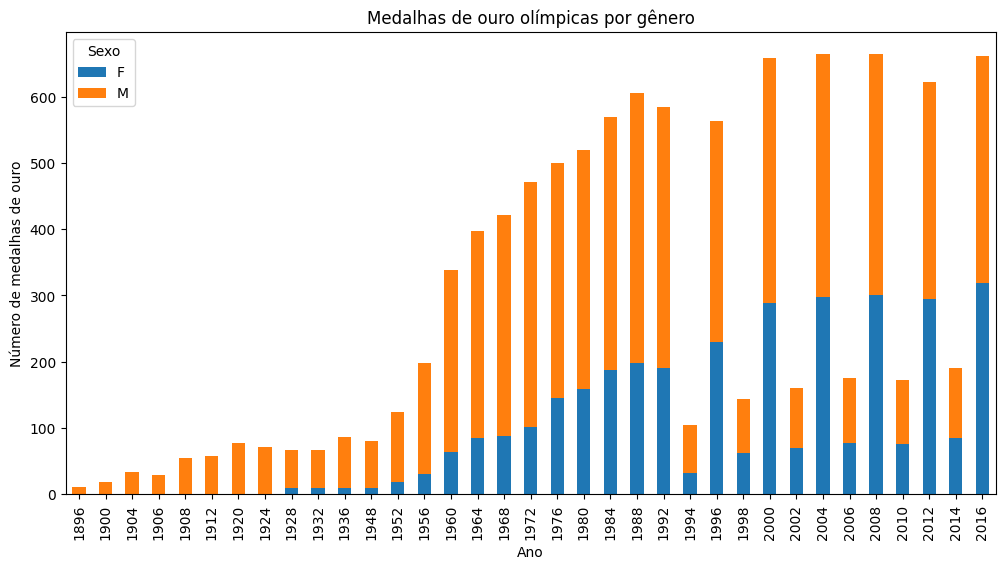

In [14]:
# Selecionamos apenas as linhas de homens e mulheres que ganharam medalhas de ouro
# Em seguida, utliza-se o método pivot() para transformar o df, agrupando o número de medalhas de ouro por ano e gênero.
# Para comparar o total de medalhas de ouro por gênero ao longo do tempo, plotamos um gráfico de barras empilhado (kind = 'bar', stacked = True)

df_ouro = df[(df['Medalha'] == 'Gold') & (df['Sexo'].isin(['M', 'F']))]
df_ouro_genero = df_ouro.groupby(['Ano', 'Sexo'])['Medalha'].count().reset_index()

df_ouro_genero_pivot = df_gold_genero.pivot(index='Ano', columns='Sexo', values='Medalha')

ax = df_ouro_genero_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_xlabel('Ano')
ax.set_ylabel('Número de medalhas de ouro')
ax.set_title('Medalhas de ouro olímpicas por gênero')
plt.show()

In [15]:

# Selecionar atletas brasileiros
df_atletas_brasil = df[df["NOC"] == "BRA"]

# Número de atletas brasileiros 
num_atletas_brasil = df_atletas_brasil["Nome"].nunique()
print("Número de atletas brasileiros: ", num_atletas_brasil)

# Total de medalhas ganhas pelos atletas brasileiros
total_medalhas_brasil = df_atletas_brasil["Medalha"].count()
print("Total de medalhas: ", total_medalhas_brasil)

# Quantidade de medalhas de ouro dos atletas brasileiros
medalhas_ouro_brasil = df_atletas_brasil[df_atletas_brasil["Medalha"] == "Gold"]["Medalha"].count()
print("Medalhas de ouro: ", medalhas_ouro_brasil )

# Quantidade de medalhas de prata dos atletas brasileiros
medalhas_prata_brasil = df_atletas_brasil[df_atletas_brasil["Medalha"] == "Silver"]["Medalha"].count()
print("Medalhas de prata: ", medalhas_prata_brasil)

# Quantidade de medalhas de bronze dos atletas brasileiros
medalhas_bronze_brasil = df_atletas_brasil[df_atletas_brasil["Medalha"] == "Bronze"]["Medalha"].count()
print("Medalhas de bronze: ", medalhas_bronze_brasil)

# Esportes em que os atletas brasileiros competiram
# nunique() conta o número de esportes únicos na coluna 'Esporte',retornando o número de esportes praticados por brasileiros 
esportes_brasil = df_atletas_brasil["Esporte"].nunique()
print("Esportes: ", esportes_brasil)


Número de atletas brasileiros:  334
Total de medalhas:  447
Medalhas de ouro:  107
Medalhas de prata:  168
Medalhas de bronze:  172
Esportes:  15


In [ ]:
# Quantidade de atletas brasileiras na base de dados
# nunique() é usada para contar o número de nomes únicos de mulheres na coluna 'Nome' nas linhas selecionadas
df_brasil_mulheres = df[(df["NOC"] == "BRA") & (df["Sexo"] == "F")]
mulheres_brasileiras = df_brasil_mulheres["Nome"].nunique()
print("Número de atletas mulheres brasileiras: ", mulheres_brasileiras)


Número de atletas mulheres brasileiras:  102


In [ ]:
# Proporção de mulheres brasileiras na base de dados
prop_mulheres = mulheres_brasileiras / num_atletas_brasil
print("Proporção de atletas brasileiras: ", prop_mulheres)

Proporção de atletas brasileiras:  0.30538922155688625


In [ ]:
#  Quantidade dos atletas brasileiros
df_brasil_homens = df[(df["NOC"] == "BRA") & (df["Sexo"] == "M")]
homens_brasileiros = df_brasil_homens["Nome"].nunique()
print("Número de atletas homens brasileiras: ", homens_brasileiros)

Número de atletas homens brasileiras:  232


In [ ]:
# Proporção de homens brasileiros
prop_homens = homens_brasileiros / num_atletas_brasil
print("Proporção de atletas brasileiros: ", prop_homens)

Proporção de atletas brasileiros:  0.6946107784431138


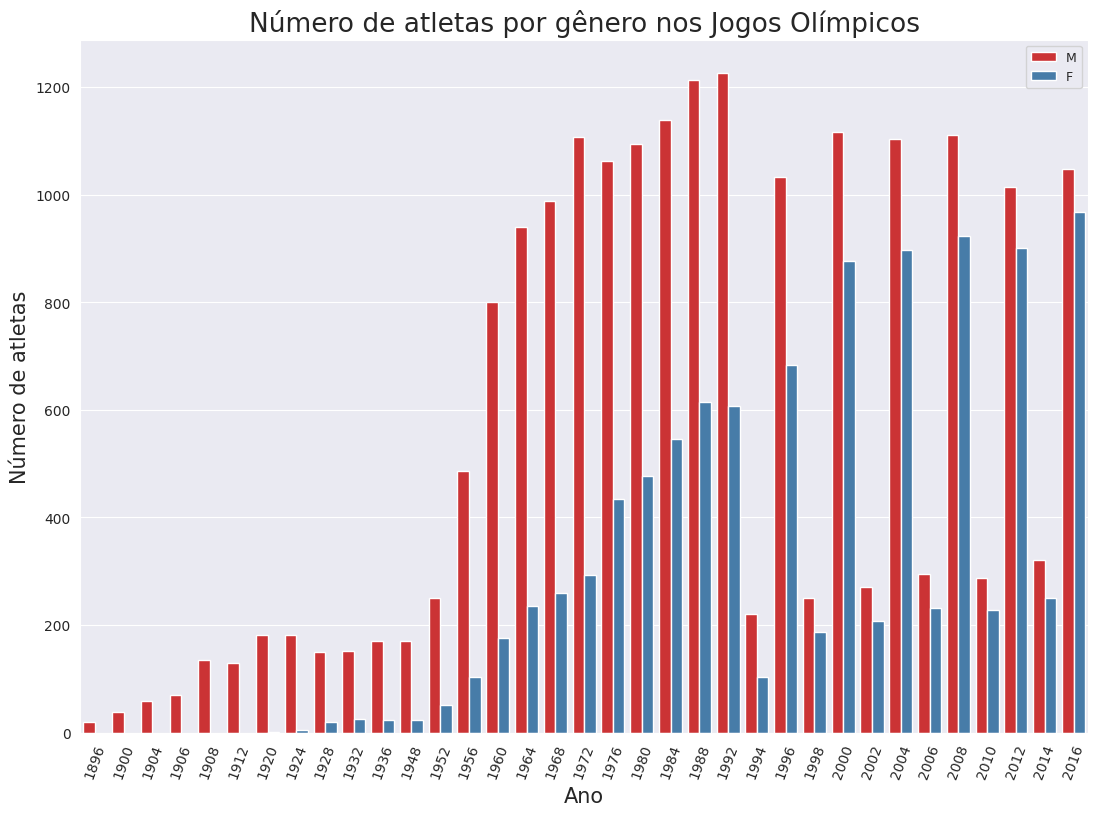

In [ ]:
# Filtrar dados dos atletas por gênero e ano
# O método reset_index() redefine o índice do df e cria uma nova coluna "Número de Atletas" para armazenar os valores do índice anterior.
df_genero_ano = df.groupby(["Ano", "Sexo"]).size().reset_index(name="Número de atletas")

# Criar gráfico de barras empilhadas
sns.set_style("darkgrid")
sns.set_palette("Set1")
plt.figure(figsize=(13,9))
sns.barplot(x="Ano", y="Número de atletas", hue="Sexo", data=df_genero_ano)
plt.title("Número de atletas por gênero nos Jogos Olímpicos", fontsize=19)
plt.xlabel("Ano", fontsize=15)
plt.ylabel("Número de atletas", fontsize=15)
plt.xticks(rotation=70)
plt.legend(fontsize=9)
plt.show()


###CONCLUSÃO:

###Dada a análise, é possível concluir que há uma diferença significativa na quantidade de medalhas conquistadas por homens e mulheres nos Jogos Olímpicos.

###Uma possível explicação para tal fato é o a desigualdade de gênero dentro dos esportes e Olimpíadas , na oportunidade de participar, ter apoio médico e patrocínio para garantir maior rendimento das atletas.